# Question 1
* Learn and understand Zipf’s Law.
* Pick any file (or files) in NLTK package.
* Prove if Zipf’s Law works in Natural Language or not.
##### REQUIREMNTS: (Must Do)
* Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
* Create at least one function and one lambda function.
* Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.
* Open your CSV file, generate a log-log figure according to the data you saved.
* Write a conclusion at the end of your code base on your figure. 
* (Optional) Use ‘matplotlib’ to generate a log-log figure in your code.

In [1]:
import nltk
import re
from operator import itemgetter
import numpy
import matplotlib.pyplot as plt
from glob import glob
import math

In [2]:
# this function takes in a text file and outputs a list of words from that file
def txt2words(path):
    file = glob(path)
    with open(file[0],'r') as f:
        words = [word for line in f for word in line.split()]
    f.close()
    return words

In [3]:
book = txt2words(str(nltk.corpus.gutenberg.root)+ '\melville-moby_dick.txt')

In [4]:
#eliminate any words that do not consist of letters of the alphabet
words = [w for w in book if w.isalpha()]

In [5]:
#make a seperate list of each unique word in the file
uniquewords = list(set(words))

In [6]:
#make a list of lists, with each submist consisting of
#a rank placeholder, word, and frequency

zipf = []
temp=[0]
for w in uniquewords:
    temp[0] = [0,w,words.count(w)]
    zipf.append(temp[0])

In [7]:
#sort the list by the frequency of the word
zipf = sorted(zipf,key=itemgetter(2), reverse = True)

In [8]:
#the number of words in the file is the length of the list of words in the file
numwords = len(words)

In [9]:
#define a lambda function for calculating logarithmns in base 10
log = (lambda x:math.log10(x))

In [10]:
#fully create a 2D list with 1 entry per word, sorted by word frequency
#each entry is in the format: 
#[word rank, word, frequency, rank*P(word), log(rank),log(frequency)]

for i in range(len(zipf)):
    zipf[i][0] = i + 1 #rank
    zipf[i].append((zipf[i][0]) * (zipf[i][2])/numwords) # r*P(r)
    zipf[i].append(log(zipf[i][0])) #log(r)
    zipf[i].append(log((zipf[i][2]))) #log(freq(r))

In [11]:
#create an array of the r*p(r) values, which is at index 4 of the zipf array
zipfcalc=[0]*len(zipf)
for n in range(len(zipf)):
    zipfcalc[n] = zipf[n][3]
    
#calculate the standard deviation of this array
print("Standard Deviation of (r*freq(r))/N for all r is:" + str(numpy.std(zipfcalc)))

Standard Deviation of (r*freq(r))/N for all r is:0.0137582523702


##### Conclusion:
As the standard deviation is close to zero, this approximately follows Zipf's law. This is because Zipf's law states that r\*P(r) = A\*N, which means (r\*freq(r))/N = A for all words. This A is constant across the data set if the standard deviation of (r\*freq(r))/N for all values of r is close to zero

### Outputting this Data to a CSV for Storage and Further Analysis

In [12]:
#open file or create it if the file does not exist
f = open("Q1output.csv","w+")

In [13]:
#write header for file
f.write("Rank(w), Word, Freq(w), r*P(w), log(r), log(Freq(w)) \n")

54

In [14]:
#write the 2D zipf list to the file

for i in range(len(zipf)):
    for j in range(len(zipf[0])):
        f.write(str(zipf[i][j]) + ",")
    f.write("\n")

In [15]:
#close the file
f.close()

## Plot Zipf's Law

In [16]:
#create x and y lists for log(r) and log(freq(r))
logr = []
logfreqr = []
for i in range(len(zipf)):
    logr.append(zipf[i][4])
    logfreqr.append(zipf[i][5])

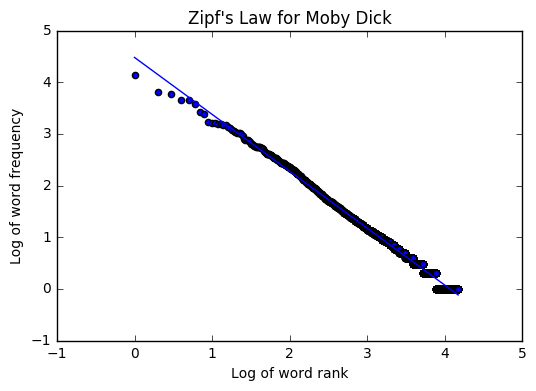

In [17]:
#plot the data in a scatterplot
plt.scatter(logr,logfreqr)
#plot the best fit line for the data
plt.plot(numpy.unique(logr),numpy.poly1d(numpy.polyfit(logr,logfreqr,1))(numpy.unique(logr)))

#label the axes and print the graph
plt.title('Zipf\'s Law for Moby Dick')
plt.xlabel("Log of word rank")
plt.ylabel("Log of word frequency")
plt.show()

### Conclusion:
As seen above, the best fit line of the scatter plot of log(word rank) vs log (word frequency) has a slope of approximately -1, proving that Zipf's law holds for the book Moby Dick by Herman Melville.